In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('fraud_Ecom_lgbm_LLAMA-PCA50_feature_importance.csv')
df200 = pd.read_csv('fraud_Ecom_lgbm_LLAMA-PCA200_feature_importance.csv')
df_w2v = pd.read_csv('fraudecom_lgbm_w2v_feature_importance.csv')

In [42]:
# make the above cell to a function
def get_pca_features(df):
    list_of_pca_features = df[df
        .feature
        .str
        .contains
        ('pca')].feature.tolist()

    list_of_pca_features = [x.split('_')[:-2] for x in list_of_pca_features]

    list_of_pca_features = ['_'.join(x) for x in list_of_pca_features]

    list_of_pca_features =  df.feature.tolist()[:4] + list_of_pca_features 

    df_pca = df.copy()
    df_pca['feature'] = list_of_pca_features
    return df_pca

df_pca_200 = get_pca_features(df200)
df_pca_50 = get_pca_features(df)


<Axes: title={'center': 'PCA 50'}, ylabel='importance'>

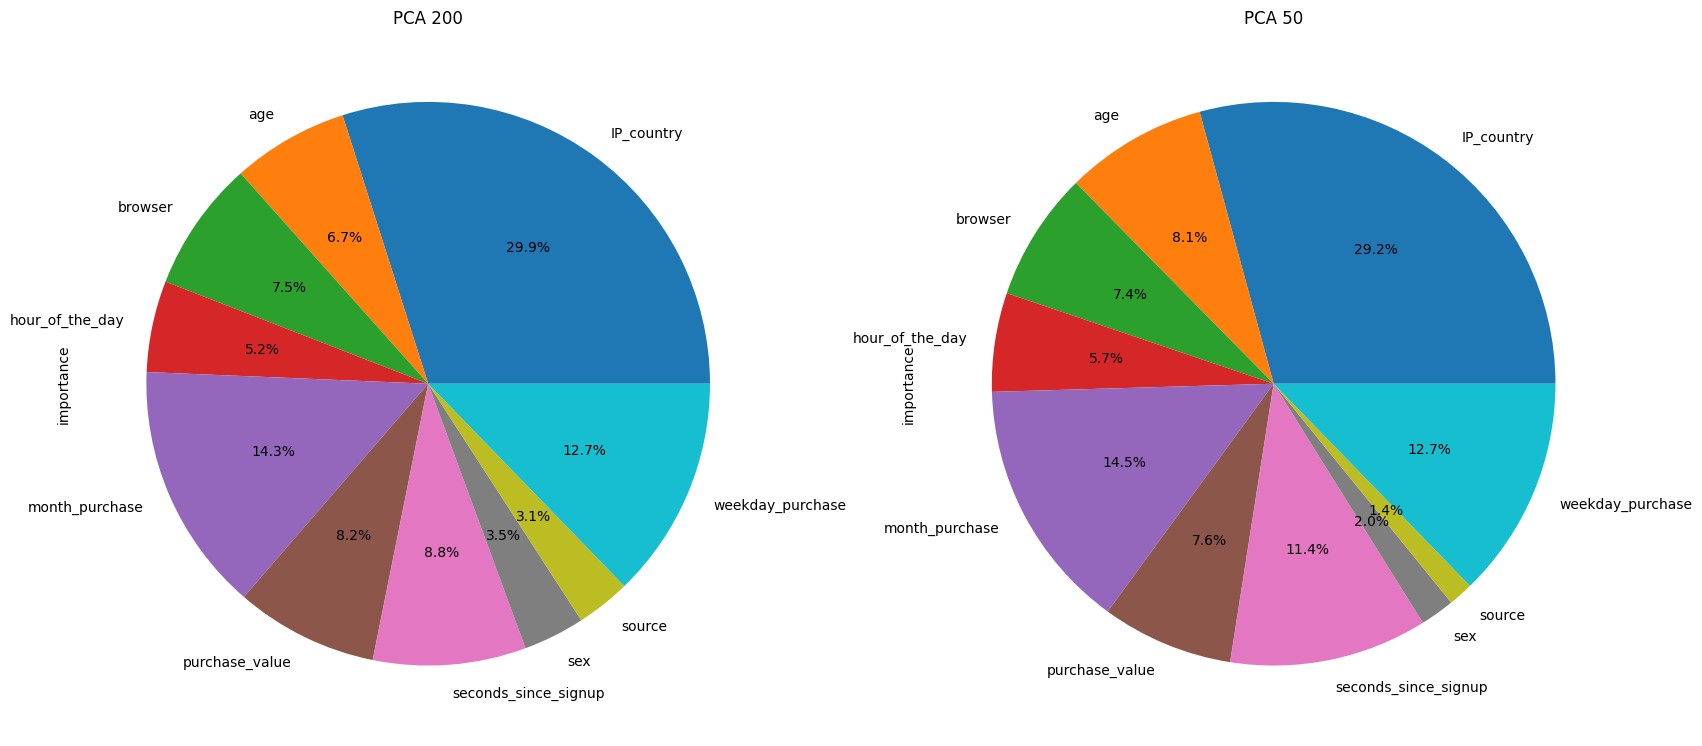

In [71]:

# group by the feature and sum the importance
df_pca_200 = df_pca_200.groupby('feature').sum().reset_index()
df_pca_50 = df_pca_50.groupby('feature').sum().reset_index()

# define subplots 2x1 and the size
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# plot the first subplot
df_pca_200.plot(kind='pie', y='importance', labels=df_pca_200.feature, ax=ax[0], autopct='%1.1f%%', legend=False, title='PCA 200')
# plot the second subplot
df_pca_50.plot(kind='pie', y='importance', labels=df_pca_50.feature, ax=ax[1], autopct='%1.1f%%', legend=False, title='PCA 50')


#

In [73]:
df_pca_50.feature

0              IP_country
1                     age
2                 browser
3         hour_of_the_day
4          month_purchase
5          purchase_value
6    seconds_since_signup
7                     sex
8                  source
9        weekday_purchase
Name: feature, dtype: object

<Axes: title={'center': 'One Hot Encoding'}, ylabel='importance'>

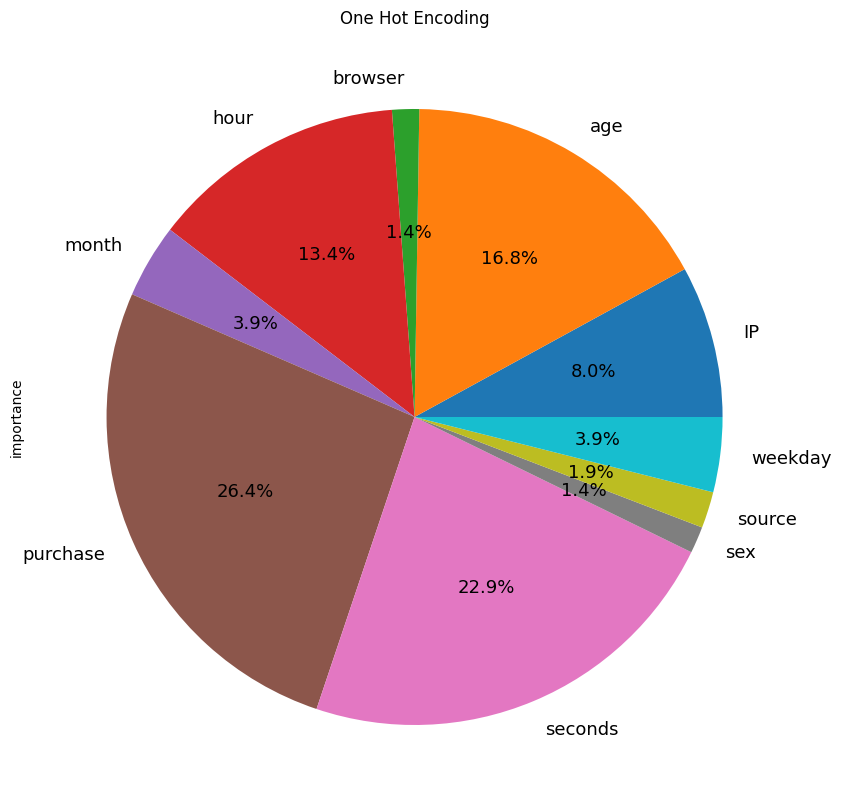

In [83]:
df_oh = pd.read_csv('fraud_Ecom_lgbm_OH_feature_importance.csv')

# sum the importance of the features based on the df_pca_50.feature 
# if contain IP_country and then if contain month_purchase etc
df_oh['feature'] = df_oh.feature.str.split('_').str[:1].str.join('_')
df_oh = df_oh.groupby('feature').sum().reset_index()
df_oh.plot(kind='pie', y='importance', labels=df_oh.feature, autopct='%1.1f%%', legend=False, title='One Hot Encoding', figsize=(10, 10), fontsize=13)

In [88]:
df_oh.feature

0          IP
1         age
2     browser
3        hour
4       month
5    purchase
6     seconds
7         sex
8      source
9     weekday
Name: feature, dtype: object

<Axes: title={'center': 'Target Encoding'}, ylabel='importance'>

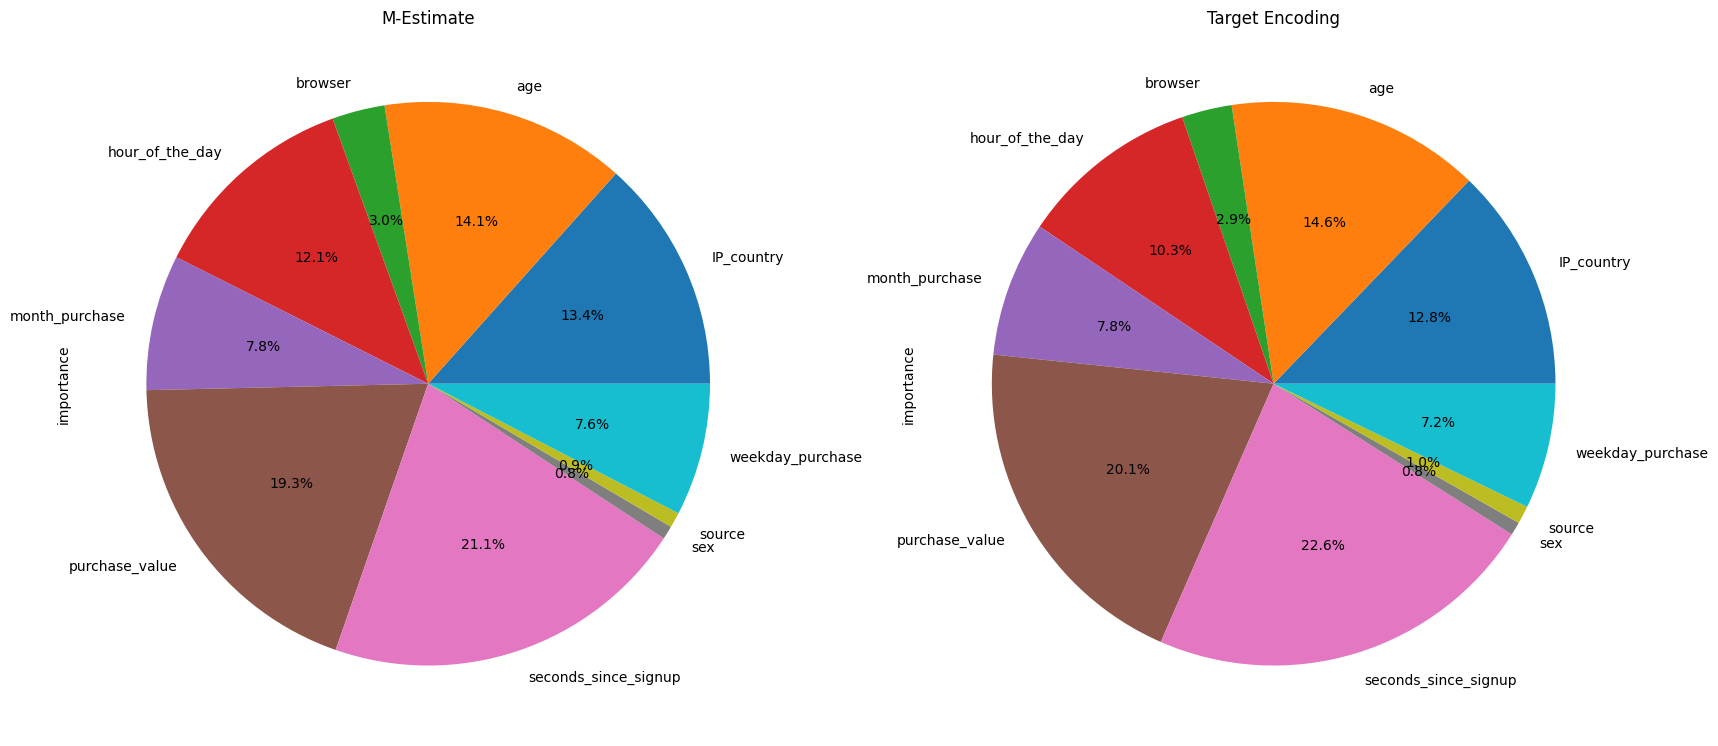

In [91]:
df_me = pd.read_csv('fraud_Ecom_lgbm_ME_feature_importance.csv')
df_TE = pd.read_csv('fraud_Ecom_lgbm_TE_feature_importance.csv')

# sort the rows by the order of df_pca_50.feature
df_me = df_me.set_index('feature').loc[df_pca_50.feature].reset_index()
df_TE = df_TE.set_index('feature').loc[df_pca_50.feature].reset_index()


# subplots 1x2
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# plot the first subplot
df_me.plot(kind='pie', y='importance', labels=df_me.feature, ax=ax[0], autopct='%1.1f%%', legend=False, title='M-Estimate')
# plot the second subplot
df_TE.plot(kind='pie', y='importance', labels=df_TE.feature, ax=ax[1], autopct='%1.1f%%', legend=False, title='Target Encoding')

In [ ]:
# #  remove the _ and what's after that from the feature in df_pca_w2v
# df_w2v['feature'] = df_w2v.feature.str.split('_').str[:-1].str.join('_')

# # group by the feature and sum the importance
# df_w2v = df_w2v.groupby('feature').sum().reset_index()

# # plot the third subplot
# #df_w2v.plot(kind='pie', y='importance', labels=df_w2v.feature, autopct='%1.1f%%', legend=False, title='Word2Vec', ax=ax[2])
